In [ ]:
import pandas as pd
data = pd.read_csv("/content/Fish.csv")
data.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
 6   Weight   159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
data["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Species"] = le.fit_transform(data["Species"])
# data["Length3"] = le.fit_transform(data["Length3"])
data.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,0,23.2,25.4,30.0,11.5200,4.0200,242.0
1,0,24.0,26.3,31.2,12.4800,4.3056,290.0
2,0,23.9,26.5,31.1,12.3778,4.6961,340.0
3,0,26.3,29.0,33.5,12.7300,4.4555,363.0
4,0,26.5,29.0,34.0,12.4440,5.1340,430.0


In [ ]:
data = pd.DataFrame(data)
data.head()
data["Species"].value_counts()

2    56
0    35
4    20
3    17
5    14
1    11
6     6
Name: Species, dtype: int64

In [ ]:
x = data.drop("Species", axis = 1).values
y = data["Species"].values
print(x.shape, y.shape)

(159, 6) (159,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
# print(x)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(127, 6) (127,)
(32, 6) (32,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_test, y_test)

0.78125

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 5  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0  0  0  5  0]
 [ 0  1  0  0  0  0]]
0.78125


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

0.75

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
d_tree.score(X_test, y_test)

0.65625

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)

SVC()

In [ ]:
sv.score(X_test, y_test)

0.75

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (30, 20), max_iter = 100)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=100)

In [ ]:
mlp.score(X_test, y_test)

0.71875

In [ ]:
from sklearn.linear_model import Perceptron 
p = Perceptron()
p.fit(X_train, y_train)

Perceptron()

In [ ]:
p.score(X_test, y_test)

0.75

In [ ]:
from sklearn.decomposition import PCA

p = PCA(n_components = 4)
X_train = p.fit_transform(X_train)
X_test = p.transform(X_test)

cls = LogisticRegression()
cls.fit(X_train,  y_train)

LogisticRegression()

In [ ]:
cls.score(X_test, y_test)

0.75

## K_MEans

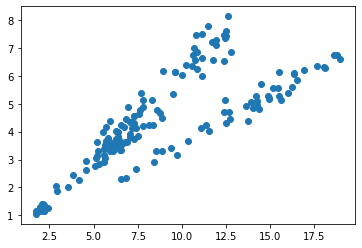

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data["Height"], data["Width"])

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)

In [ ]:
y_pred = km.fit_predict(data[["Height", "Width"]])
y_pred

array([3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 3, 3, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4], dtype=int32)

In [ ]:
data["cluster"] = y_pred
data.head(30)

,Species,Length1,Length2,Length3,Height,Width,Weight,cluster
0,0,23.2,25.4,30.0,11.5200,4.0200,242.0,3
1,0,24.0,26.3,31.2,12.4800,4.3056,290.0,3
2,0,23.9,26.5,31.1,12.3778,4.6961,340.0,3
3,0,26.3,29.0,33.5,12.7300,4.4555,363.0,3
4,0,26.5,29.0,34.0,12.4440,5.1340,430.0,3
5,0,26.8,29.7,34.7,13.6024,4.9274,450.0,1
6,0,26.8,29.7,34.5,14.1795,5.2785,500.0,1
7,0,27.6,30.0,35.0,12.6700,4.6900,390.0,3
8,0,27.6,30.0,35.1,14.0049,4.8438,450.0,1
9,0,28.5,30.7,36.2,14.2266,4.9594,500.0,1


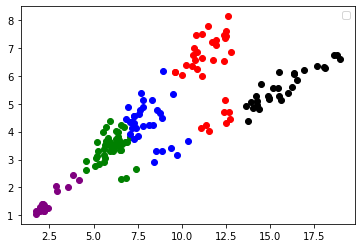

In [ ]:
df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]
df3 = data[data.cluster == 2]
df4 = data[data.cluster == 3]
df5 = data[data.cluster == 4]

plt.scatter(df1.Height, df1.Width, color = "green")
plt.scatter(df2.Height, df2.Width, color = "black")
plt.scatter(df3.Height, df3.Width, color = "blue")
plt.scatter(df4.Height, df4.Width, color = "red")
plt.scatter(df5.Height, df5.Width, color = "purple")


plt.legend()